### SMS Spam Detector

Este notebook tiene como objetivo desarrollar un detector de spam para mensajes SMS. El proceso consiste en aplicar técnicas de procesamiento de lenguaje natural (NLP) para limpiar, transformar y analizar los datos, y posteriormente entrenar un modelo de aprendizaje automático para clasificar los mensajes como "spam" o "ham" (no spam).

#### Pasos principales:
1. **Carga y exploración de datos**: Se carga un conjunto de datos de mensajes SMS etiquetados como "spam" o "ham". Se realiza una exploración inicial para entender la estructura y calidad de los datos.
2. **Preprocesamiento de texto**:
    - Eliminación de palabras irrelevantes (*stop words*).
    - Aplicación de *stemming* para reducir las palabras a su raíz.
3. **Entrenamiento del modelo**: Se utilizarán algoritmos de aprendizaje automático para entrenar un modelo que pueda clasificar nuevos mensajes.
4. **Evaluación del modelo**: Se evaluará el rendimiento del modelo utilizando métricas como precisión, recall y F1-score.

El objetivo final es construir un modelo que pueda identificar automáticamente mensajes de spam con alta precisión.

In [ ]:
# Descomentar la siguiente línea si se necesita descargar el archivo CSV
#!wget https://raw.githubusercontent.com/mohitgupta-1O1/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv



--2025-04-07 13:24:41--  https://raw.githubusercontent.com/mohitgupta-1O1/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [application/octet-stream]
Saving to: ‘spam.csv.2’

spam.csv.2          100%[===================>] 491.86K  --.-KB/s    in 0.07s   

2025-04-07 13:24:41 (6.80 MB/s) - ‘spam.csv.2’ saved [503663/503663]



In [ ]:
import pandas as pd


# Cargar el archivo CSV
df = pd.read_csv("spam.csv", encoding='latin-1')

# Seleccionar solo las columnas necesarias
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Vista previa
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
## shape
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")
## info
print("Información del dataset:")

df.info()
## nulls
print("Valores nulos por columna:")
print(df.isnull().sum())
## duplicates
print("Duplicados por columna:")
print(df.duplicated().sum())
## label
print("Distribución de etiquetas:")
print(df['label'].value_counts())


El dataset tiene 5572 filas y 2 columnas.
Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
Valores nulos por columna:
label      0
message    0
dtype: int64
Duplicados por columna:
403
Distribución de etiquetas:
ham     4825
spam     747
Name: label, dtype: int64


### ¿Qué son los Stop Words?

Las *stop words* son palabras comunes en un idioma que suelen ser filtradas o eliminadas en tareas de procesamiento de lenguaje natural (NLP). Estas palabras, como "el", "la", "de", "y", "en" en español o "the", "and", "is", "in" en inglés, no aportan un significado relevante para el análisis del texto, ya que son muy frecuentes y no ayudan a diferenciar entre documentos.

Por ejemplo, en tareas como la clasificación de texto o la búsqueda de información, eliminar las *stop words* puede reducir el ruido y mejorar la eficiencia del modelo al enfocarse en las palabras más significativas.

En Python, la biblioteca `nltk` proporciona una lista predefinida de *stop words* para varios idiomas, que puede ser utilizada para este propósito.

In [3]:
import nltk
from nltk.corpus import stopwords

# Descargar las stop words si no están descargadas
nltk.download('stopwords')

# Lista de stop words en inglés
stop_words = set(stopwords.words('english'))

# Función para eliminar stop words
def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Aplicar la función a la columna 'message'
df['message'] = df['message'].apply(remove_stop_words)

# Vista previa del dataframe
df.head()

[nltk_data] Downloading package stopwords to /Users/cesar/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,label,message
0,ham,"Go jurong point, crazy.. Available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor... U c already say...
4,ham,"Nah think goes usf, lives around though"


### ¿Qué es el Stemming?

El *stemming* es un proceso en el que se reducen las palabras a su raíz o forma base, eliminando sufijos o terminaciones. Por ejemplo, las palabras "running", "runner" y "ran" se reducen a su raíz común "run". 

Este proceso es útil en tareas de procesamiento de lenguaje natural (NLP) como la búsqueda de texto o la clasificación, ya que permite tratar palabras con significados similares como equivalentes, reduciendo la dimensionalidad del texto.

En Python, una herramienta comúnmente utilizada para realizar *stemming* es el `PorterStemmer` de la biblioteca `nltk`.

In [5]:
from nltk.stem import PorterStemmer


# Crear un objeto PorterStemmer
stemmer = PorterStemmer()

# Función para aplicar stemming
def apply_stemming(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Aplicar la función a la columna 'message'
df['message'] = df['message'].apply(apply_stemming)

# Vista previa del dataframe
df.head()

,label,message
0,ham,"go jurong point, crazy.. avail bugi n great wo..."
1,ham,ok lar... joke wif u oni...
2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say earli hor... u c alreadi say...
4,ham,"nah think goe usf, live around though"


### Generar conjuntos de entrenamiento y prueba

En este paso, dividiremos los datos en conjuntos de entrenamiento y prueba antes de crear la Document-Term Matrix (DTM). Esto es importante porque:

1. **Evitar el sesgo por fuga de datos**: Si generamos la DTM antes de dividir los datos, el vocabulario de la matriz incluirá términos de todo el conjunto de datos, incluidos los del conjunto de prueba. Esto puede causar una fuga de datos (*data leakage*), ya que el modelo tendría acceso a información del conjunto de prueba durante el entrenamiento, lo que resultaría en una evaluación poco realista.

2. **Simular datos no vistos**: Dividir los datos antes de cualquier transformación asegura que el conjunto de prueba permanezca completamente separado y actúe como datos no vistos. Esto permite evaluar el rendimiento del modelo de manera más precisa y generalizable.

3. **Evitar sobreajuste**: Si el modelo se entrena con un vocabulario que incluye términos del conjunto de prueba, podría ajustarse demasiado a esos datos, lo que afectaría su capacidad para generalizar a nuevos datos.

Por estas razones, es fundamental realizar la división en conjuntos de entrenamiento y prueba antes de cualquier transformación, como la creación de la DTM.

In [7]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")

Conjunto de entrenamiento: 4457 muestras
Conjunto de prueba: 1115 muestras


### ¿Qué es una Document-Term Matrix (DTM)?

Una **Document-Term Matrix (DTM)** es una representación matricial de un conjunto de documentos en la que las filas representan los documentos y las columnas representan los términos (palabras únicas) presentes en esos documentos. Cada celda de la matriz contiene un valor que indica la frecuencia (o presencia) de un término en un documento específico.

#### Características principales:
- **Filas**: Cada fila corresponde a un documento en el corpus.
- **Columnas**: Cada columna corresponde a un término único en el vocabulario del corpus.
- **Valores**: Los valores en la matriz pueden ser:
    - Frecuencia de la palabra en el documento.
    - Presencia/ausencia de la palabra (1 si está presente, 0 si no lo está).
    - Frecuencia ponderada, como el valor TF-IDF (Term Frequency-Inverse Document Frequency).

#### Ejemplo:
Si tenemos los siguientes documentos:
1. "El gato duerme."
2. "El perro corre."

La DTM sería:

|         | el | gato | duerme | perro | corre |
|---------|----|------|--------|-------|-------|
| Doc 1   |  1 |    1 |      1 |     0 |     0 |
| Doc 2   |  1 |    0 |      0 |     1 |     1 |

#### Usos comunes:
- **Clasificación de texto**: Entrenar modelos de aprendizaje automático para clasificar documentos.
- **Análisis de texto**: Identificar patrones y relaciones entre palabras y documentos.
- **Búsqueda de información**: Encontrar documentos relevantes basados en términos de consulta.

La DTM es una herramienta fundamental en el procesamiento de lenguaje natural (NLP) y el análisis de texto, ya que convierte datos textuales no estructurados en una forma estructurada que puede ser utilizada por algoritmos de aprendizaje automático.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Crear un objeto CountVectorizer
vectorizer = CountVectorizer()

# Ajustar y transformar los datos de entrenamiento
X_train_dtm = vectorizer.fit_transform(X_train)

# Transformar los datos de prueba
X_test_dtm = vectorizer.transform(X_test)

# Mostrar la forma de la DTM
print(f"DTM de entrenamiento: {X_train_dtm.shape}")
print(f"DTM de prueba: {X_test_dtm.shape}")

DTM de entrenamiento: (4457, 7277)
DTM de prueba: (1115, 7277)


### ¿Por qué se utiliza Multinomial Naive Bayes?

El algoritmo **Multinomial Naive Bayes** es una elección común para tareas de clasificación de texto, como la detección de spam, debido a las siguientes razones:

1. **Modelo probabilístico simple y eficiente**:
    - Multinomial Naive Bayes asume que las características (en este caso, las palabras) son independientes entre sí, lo que simplifica los cálculos.
    - Este modelo calcula la probabilidad de que un mensaje pertenezca a una clase (spam o ham) basándose en la frecuencia de las palabras en el mensaje.

2. **Adecuado para datos discretos**:
    - Este algoritmo está diseñado específicamente para datos discretos, como las frecuencias de palabras en un texto, que es exactamente lo que representa la Document-Term Matrix (DTM).

3. **Rendimiento sólido en clasificación de texto**:
    - Multinomial Naive Bayes es conocido por su buen rendimiento en tareas de clasificación de texto, especialmente cuando se trabaja con datos de alta dimensionalidad como los textos.

4. **Eficiencia computacional**:
    - Es un algoritmo rápido y eficiente, lo que lo hace adecuado para conjuntos de datos grandes como el utilizado en este proyecto.

5. **Interpretabilidad**:
    - Las probabilidades calculadas por el modelo son fáciles de interpretar, lo que permite entender qué palabras contribuyen más a la clasificación de un mensaje como spam o ham.

En resumen, Multinomial Naive Bayes es una opción ideal para este proyecto debido a su simplicidad, eficiencia y capacidad para manejar datos textuales representados como frecuencias de palabras.

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Crear el modelo de Naive Bayes
nb_model = MultinomialNB()

# Entrenar el modelo con los datos de entrenamiento
nb_model.fit(X_train_dtm, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = nb_model.predict(X_test_dtm)

# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9856502242152466

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       965
        spam       0.98      0.91      0.94       150

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



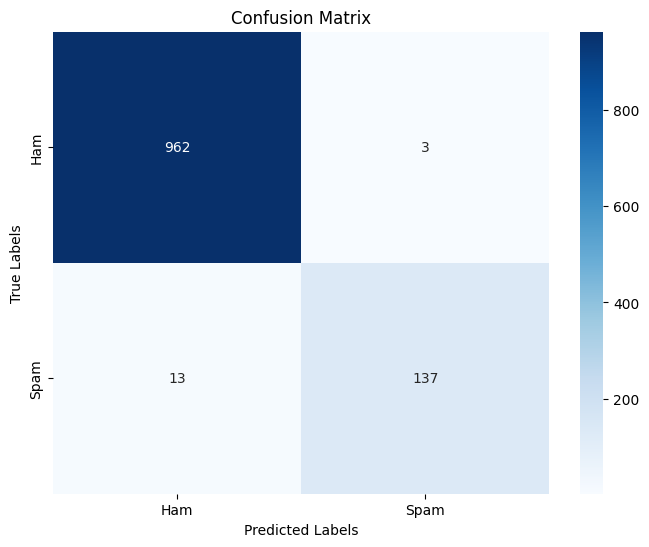

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()